In [1]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA as sklearnPCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
numeric_colums = ['wheelbase', 'carlength', 'carwidth',
                  'carheight', 'curbweight', 'enginesize',
                  'boreratio', 'stroke', 'compressionratio',
                  'horsepower', 'peakrpm', 'citympg',
                  'highwaympg', 'price']
train_x = data[numeric_colums]
train_x.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
# Normalize the values to [0, 1]
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1), copy=True)
train_x = min_max_scaler.fit_transform(train_x)
pd.DataFrame(train_x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


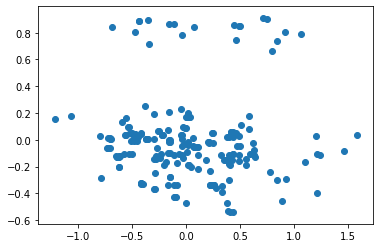

In [22]:
# 使用PCA降维到2D可视化，查看数据是否可以聚类
pca = sklearnPCA(n_components=2) 
transformed = pd.DataFrame(pca.fit_transform(train_x))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(transformed[0], transformed[1])

plt.show()

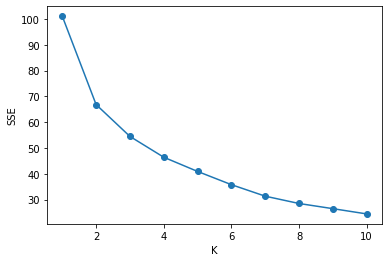

In [23]:
# 手肘法选择k值
sse = []
for k in range(1, 11):
	kmeans = KMeans(n_clusters=k)
	kmeans.fit(train_x)
	sse.append(kmeans.inertia_)
x = range(1, 11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

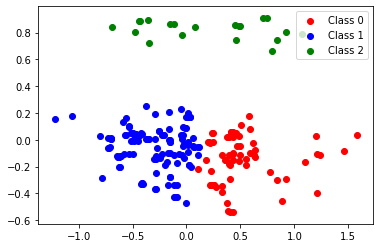

In [24]:
# 根据手肘原则，选择k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(transformed[predict_y==0][0], transformed[predict_y==0][1], label='Class 0', c='red')
ax.scatter(transformed[predict_y==1][0], transformed[predict_y==1][1], label='Class 1', c='blue')
ax.scatter(transformed[predict_y==2][0], transformed[predict_y==2][1], label='Class 2', c='green')

plt.legend()
plt.show()

In [25]:
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'cluster id'},axis=1,inplace=True)
result.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cluster id
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0


In [26]:
result.to_csv('CarPrice_clustered.csv')